# Лабораторная работа №2. Понижение размерности пространства признаков
## Загрузка данных

In [124]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, FactorAnalysis

In [125]:
df = pd.read_csv('glass.csv')

var_names = list(df.columns) #получение имен признаков

labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

In [126]:
data = preprocessing.minmax_scale(data)

In [127]:
def show_scatters(data):
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    for i in range(data.shape[1] - 1):
        axs[i // 4, i % 4].scatter(data[:,i], data[:,(i+1)], c=labels, cmap='hsv')
        axs[i // 4, i % 4].set_xlabel(var_names[i])
        axs[i // 4, i % 4].set_ylabel(var_names[i + 1])

    fig.tight_layout()
    plt.show()

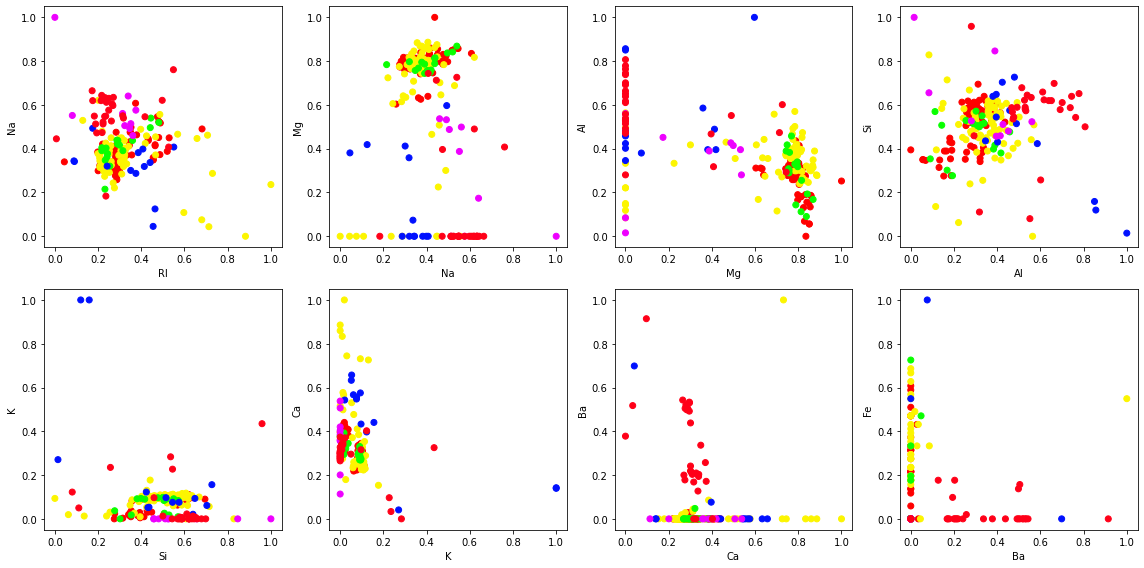

In [128]:
show_scatters(data)

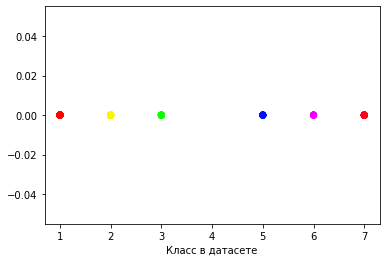

In [129]:
plt.scatter(labels, [0]*len(labels), c=labels, cmap='hsv')
plt.xlabel('Класс в датасете')
plt.show()

## Метод главных компонент

In [130]:
pca = PCA(n_components = 4)
pca_data = pca.fit_transform(data)

In [131]:
pca.explained_variance_ratio_

array([0.45429569, 0.17990097, 0.12649459, 0.09797847])

In [132]:
sum(pca.explained_variance_ratio_)

0.858669730510272

In [133]:
pca.singular_values_

array([5.1049308 , 3.21245688, 2.69374532, 2.3707507 ])

In [134]:
np.sum(pca.singular_values_**2) / np.sum(PCA(n_components = data.shape[1]).fit(data).singular_values_**2)

0.8586697305102718

In [135]:
def show_scatter(data):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='hsv')
    plt.xlabel('Первый компонент')
    plt.ylabel('Второй компонент')
    plt.show()

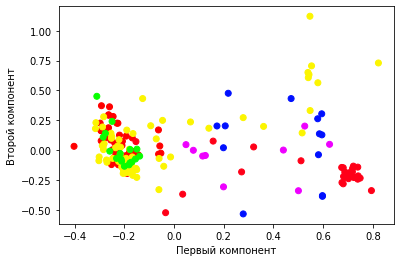

In [136]:
show_scatter(pca_data)

In [137]:
recovered_data = pca.inverse_transform(pca_data)
print('Mean', np.mean(data, axis=0))
print('Recovered mean', np.mean(recovered_data, axis=0), '\n')
print('Var', np.var(data, axis=0))
print('Recovered var', np.var(recovered_data, axis=0))


Mean [0.31674366 0.40268428 0.59789147 0.35978397 0.50730975 0.08004124
 0.32778463 0.05557039 0.11178303]
Recovered mean [0.31674366 0.40268428 0.59789147 0.35978397 0.50730975 0.08004124
 0.32778463 0.05557039 0.11178303] 

Var [0.01768923 0.01500877 0.10271865 0.02407831 0.01904075 0.01097826
 0.01741184 0.02479937 0.03633193]
Recovered var [0.01682335 0.00470997 0.10227938 0.01838518 0.01673284 0.00190895
 0.01650012 0.01741695 0.03541578]


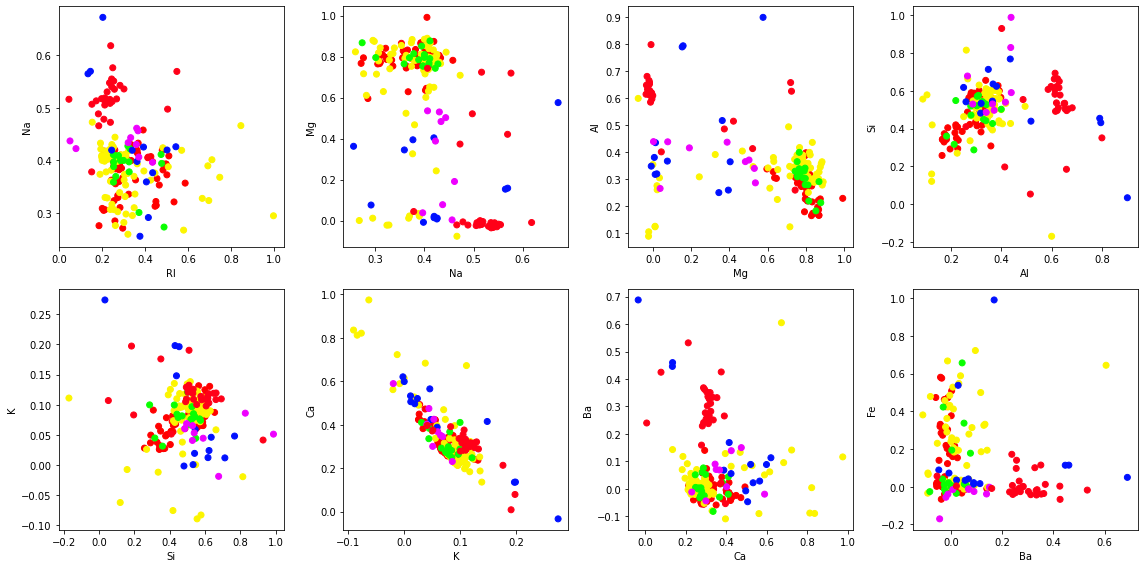

In [138]:
show_scatters(recovered_data)

In [139]:
pca_full = PCA(n_components = 2, svd_solver='full')
pca_full_svd_data = pca_full.fit_transform(data)

pca_arpack = PCA(n_components = 2, svd_solver='arpack')
pca_arpack_svd_data = pca_arpack.fit_transform(data)

pca_randomized = PCA(n_components = 2, svd_solver='randomized')
pca_randomized_svd_data = pca_randomized.fit_transform(data)

In [140]:
def print_pca(pca):
    print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
    print(pca.singular_values_)
    print('\n')

print_pca(pca)
print_pca(pca_full)
print_pca(pca_arpack)
print_pca(pca_randomized)

[0.45429569 0.17990097 0.12649459 0.09797847] 0.858669730510272
[5.1049308  3.21245688 2.69374532 2.3707507 ]


[0.45429569 0.17990097] 0.6341966621042779
[5.1049308  3.21245688]


[0.45429569 0.17990097] 0.634196662104278
[5.1049308  3.21245688]


[0.45429569 0.17990097] 0.6341966621042784
[5.1049308  3.21245688]




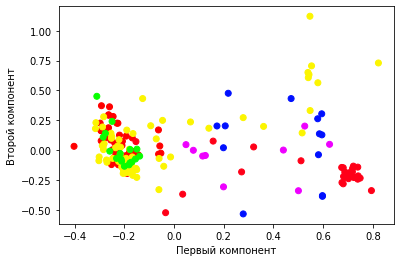

In [141]:
show_scatter(pca_full_svd_data)

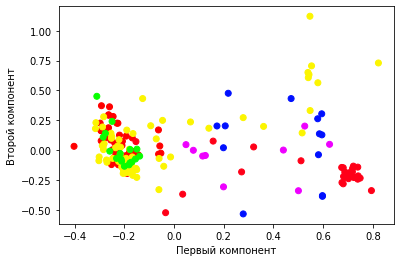

In [142]:
show_scatter(pca_arpack_svd_data)

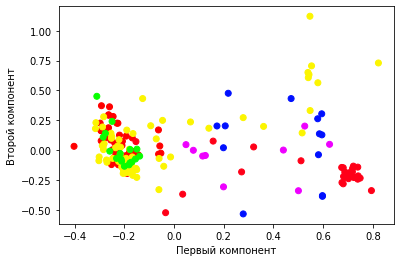

In [143]:
show_scatter(pca_randomized_svd_data)

## Модификации метода главных компонент

In [157]:
def get_kernel_pca_data(kernel='linear'):
    kernel_pca = KernelPCA(n_components=4, kernel=kernel)
    kernel_pca_all = KernelPCA(n_components=data.shape[1], kernel=kernel).fit(data)
    kernel_pca_data = kernel_pca.fit_transform(data)
    print('eigenvals', kernel_pca.lambdas_)
    print('var', np.sum(kernel_pca.lambdas_) / np.sum(kernel_pca_all.lambdas_))
    plt.title(kernel)
    show_scatter(kernel_pca_data)

eigenvals [26.06031845 10.31987923  7.25626387  5.6204589 ]
var 0.858669730510272


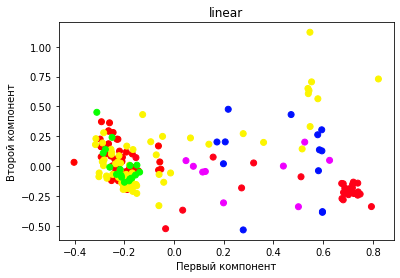

In [158]:
get_kernel_pca_data(kernel='linear')

eigenvals [10.9181964   4.31937695  3.1188508   2.36791674]
var 0.8490317237345796


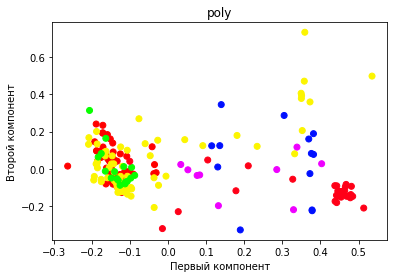

In [159]:
get_kernel_pca_data(kernel='poly')

eigenvals [5.35145251 2.0180542  1.4957381  1.11090453]
var 0.8499381817557576


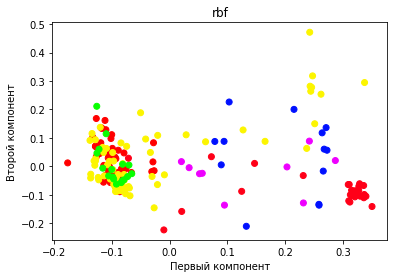

In [160]:
get_kernel_pca_data(kernel='rbf')

eigenvals [1.00618101 0.39983752 0.27409853 0.2161195 ]
var 0.8618649340638384


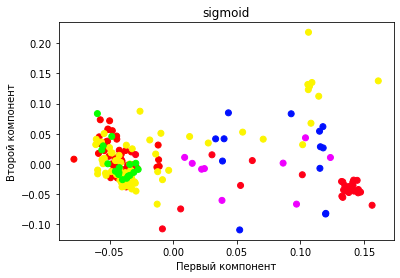

In [161]:
get_kernel_pca_data(kernel='sigmoid')

eigenvals [18.31403041  6.47538495  4.6959991   3.57812492]
var 0.8599435287117829


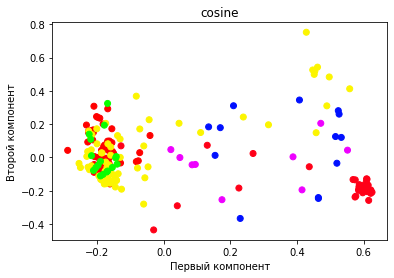

In [162]:
get_kernel_pca_data(kernel='cosine')

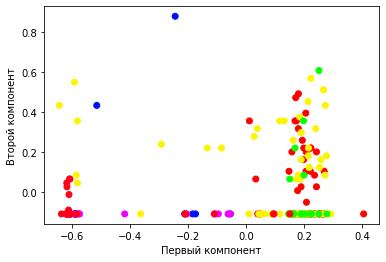

In [175]:
sparse_pca = SparsePCA(n_components=2, method='lars')
sparse_pca_data = sparse_pca.fit_transform(data)
show_scatter(sparse_pca_data)

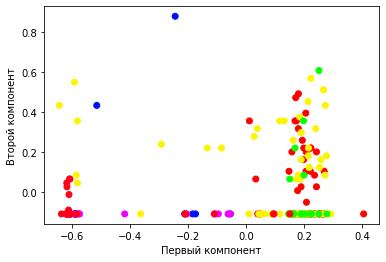

In [174]:
sparse_pca = SparsePCA(n_components=2, method='cd')
sparse_pca_data = sparse_pca.fit_transform(data)
show_scatter(sparse_pca_data)

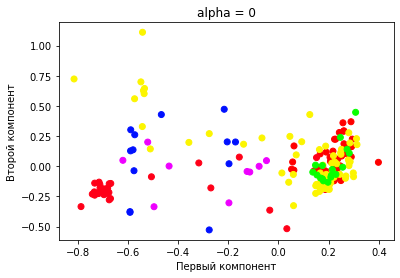

In [181]:
sparse_pca = SparsePCA(n_components=2, method='lars', alpha=0)
sparse_pca_data = sparse_pca.fit_transform(data)
plt.title('alpha = 0')
show_scatter(sparse_pca_data)

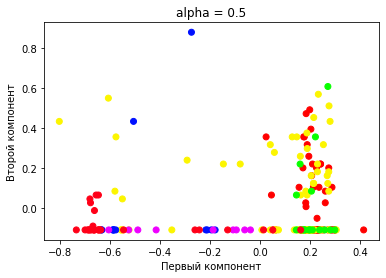

In [179]:
sparse_pca = SparsePCA(n_components=2, method='lars', alpha=0.5)
sparse_pca_data = sparse_pca.fit_transform(data)
plt.title('alpha = 0.5')
show_scatter(sparse_pca_data)

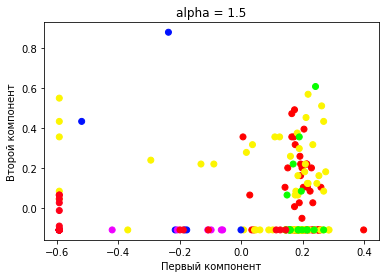

In [180]:
sparse_pca = SparsePCA(n_components=2, alpha=1.5)
sparse_pca_data = sparse_pca.fit_transform(data)
plt.title('alpha = 1.5')
show_scatter(sparse_pca_data)

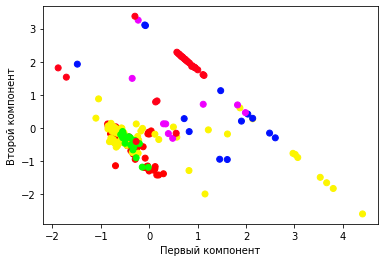

In [182]:
fa = FactorAnalysis(n_components=2)
fa_data = fa.fit_transform(data)
show_scatter(fa_data)